In [76]:
import polars as pl
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Audio, HTML


In [77]:
train = pl.read_csv("./data/train.csv", null_values={"latitude": "None", "longitude": "None"}, infer_schema_length=10_0000)
train

primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
str,str,str,str,str,f64,str,f64,f64,str,str,str,str
"""1139490""","""['']""","""['']""","""1139490/CSA36385.ogg""","""CSA""",0.0,"""http://colecciones.humboldt.or…",7.3206,-73.7128,"""Ragoniella pulchella""","""Ragoniella pulchella""","""Fabio A. Sarria-S""","""cc-by-nc-sa 4.0"""
"""1139490""","""['']""","""['']""","""1139490/CSA36389.ogg""","""CSA""",0.0,"""http://colecciones.humboldt.or…",7.3206,-73.7128,"""Ragoniella pulchella""","""Ragoniella pulchella""","""Fabio A. Sarria-S""","""cc-by-nc-sa 4.0"""
"""1192948""","""['']""","""['']""","""1192948/CSA36358.ogg""","""CSA""",0.0,"""http://colecciones.humboldt.or…",7.3791,-73.7313,"""Oxyprora surinamensis""","""Oxyprora surinamensis""","""Fabio A. Sarria-S""","""cc-by-nc-sa 4.0"""
"""1192948""","""['']""","""['']""","""1192948/CSA36366.ogg""","""CSA""",0.0,"""http://colecciones.humboldt.or…",7.28,-73.8582,"""Oxyprora surinamensis""","""Oxyprora surinamensis""","""Fabio A. Sarria-S""","""cc-by-nc-sa 4.0"""
"""1192948""","""['']""","""['']""","""1192948/CSA36373.ogg""","""CSA""",0.0,"""http://colecciones.humboldt.or…",7.3791,-73.7313,"""Oxyprora surinamensis""","""Oxyprora surinamensis""","""Fabio A. Sarria-S""","""cc-by-nc-sa 4.0"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""ywcpar""","""['']""","""['']""","""ywcpar/iNat77392.ogg""","""iNat""",0.0,"""https://static.inaturalist.org…",7.6921,-80.3379,"""Amazona ochrocephala""","""Yellow-crowned Parrot""","""Yennifer Alfaro""","""cc-by-nc 4.0"""
"""ywcpar""","""['']""","""['']""","""ywcpar/iNat78624.ogg""","""iNat""",0.0,"""https://static.inaturalist.org…",8.9918,-79.4877,"""Amazona ochrocephala""","""Yellow-crowned Parrot""","""Evan Centanni""","""cc-by-nc-sa 4.0"""
"""ywcpar""","""['']""","""['']""","""ywcpar/iNat789234.ogg""","""iNat""",0.0,"""https://static.inaturalist.org…",9.2316,-70.2041,"""Amazona ochrocephala""","""Yellow-crowned Parrot""","""Henrry""","""cc-by 4.0"""


In [78]:
taxonomy = pl.read_csv("./data/taxonomy.csv", infer_schema_length=10_0000)
taxonomy

primary_label,inat_taxon_id,scientific_name,common_name,class_name
str,i64,str,str,str
"""1139490""",1139490,"""Ragoniella pulchella""","""Ragoniella pulchella""","""Insecta"""
"""1192948""",1192948,"""Oxyprora surinamensis""","""Oxyprora surinamensis""","""Insecta"""
"""1194042""",1194042,"""Copiphora colombiae""","""Copiphora colombiae""","""Insecta"""
"""126247""",126247,"""Leptodactylus insularum""","""Spotted Foam-nest Frog""","""Amphibia"""
"""1346504""",1346504,"""Neoconocephalus brachypterus""","""Neoconocephalus brachypterus""","""Insecta"""
…,…,…,…,…
"""yehcar1""",1432779,"""Milvago chimachima""","""Yellow-headed Caracara""","""Aves"""
"""yelori1""",9352,"""Icterus nigrogularis""","""Yellow Oriole""","""Aves"""
"""yeofly1""",16567,"""Tolmomyias sulphurescens""","""Yellow-olive Flycatcher""","""Aves"""


In [79]:
train["secondary_labels"].value_counts(sort=True)

secondary_labels,count
str,u32
"""['']""",25885
"""['grekis']""",254
"""['whtdov']""",165
"""['trokin']""",83
"""['banana']""",63
…,…
"""['recwoo1', 'soulap1']""",1
"""['chfmac1', 'baymac']""",1
"""['blbwre1', 'cotfly1', 'rugdov…",1


In [80]:
train["latitude"].value_counts(sort=True)

latitude,count
f64,u32
null,809
4.351,276
-22.4508,225
-14.625,187
-16.5631,186
…,…
7.6921,1
8.9918,1
9.2316,1


In [81]:
y, sr = librosa.load("./data/train_audio/21038/iNat297879.ogg", sr=32_000)
# y, sr = librosa.load("./data/train_audio/21038/iNat65519.ogg", sr=32_000)

In [82]:
y

array([-3.5897265e-05, -1.2098116e-06,  1.7118424e-06, ...,
        2.9113735e-05,  1.0259475e-05,  2.7122740e-06],
      shape=(356352,), dtype=float32)

In [83]:
# https://www.kaggle.com/code/kadircandrisolu/transforming-audio-to-mel-spec-birdclef-25
N_FFT      = 1024
HOP_LENGTH = 512
N_MELS     = 128
FMIN       = 50
FMAX       = 14000

In [84]:
S = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_LENGTH,
    n_mels=N_MELS,
    fmin=FMIN,
    fmax=FMAX,
    power=2.0,
    pad_mode="reflect",
    norm='slaney',
    htk=True,
    center=True,
)

In [85]:
S

array([[9.4635855e-09, 8.4748569e-11, 6.1036943e-08, ..., 5.6353109e-09,
        1.0929579e-08, 1.6838790e-10],
       [4.6967958e-09, 2.7561729e-11, 2.9663456e-08, ..., 7.2515029e-08,
        2.2155025e-07, 7.5380918e-08],
       [3.8331098e-09, 2.2493450e-11, 2.4208692e-08, ..., 5.9180365e-08,
        1.8080975e-07, 6.1519252e-08],
       ...,
       [2.3914186e-09, 4.5896673e-09, 3.1841783e-09, ..., 2.8671550e-09,
        2.9787910e-09, 2.8151577e-09],
       [3.2315874e-09, 3.2491361e-09, 4.2031063e-09, ..., 2.7717575e-09,
        3.8965609e-09, 4.4833928e-09],
       [1.6654494e-09, 3.0302902e-09, 3.3763277e-09, ..., 2.6218079e-09,
        4.3984043e-09, 2.5970763e-09]], shape=(128, 697), dtype=float32)

In [86]:
S_db = librosa.power_to_db(S, ref=np.max)
S_db = (S_db - S_db.min()) / (S_db.max() - S_db.min() + 1e-8)
S_db

array([[0.05694132, 0.        , 0.15813342, ..., 0.02879896, 0.06475973,
        0.        ],
       [0.01890955, 0.        , 0.11896209, ..., 0.16748782, 0.22811842,
        0.169592  ],
       [0.00787821, 0.        , 0.10793076, ..., 0.15645656, 0.21708708,
        0.15856066],
       ...,
       [0.        , 0.01765699, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01288061, ..., 0.        , 0.00876951,
        0.01638517],
       [0.        , 0.        , 0.00098982, ..., 0.        , 0.01534624,
        0.        ]], shape=(128, 697), dtype=float32)

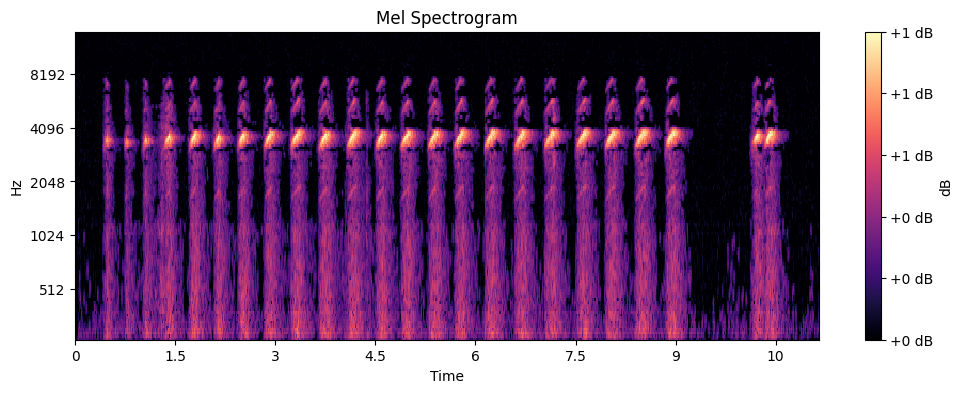

In [87]:
fig, ax = plt.subplots(figsize=(int(np.ceil(len(y) / sr)), 4))
img = librosa.display.specshow(
    S_db,
    sr=sr,
    hop_length=HOP_LENGTH,
    x_axis="time",
    y_axis="mel",
    fmin=FMIN,
    fmax=FMAX,
    ax=ax,
    htk=True,
)
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("dB")
ax.set(title="Mel Spectrogram")

display(Audio(y, rate=sr, autoplay=False))
img